In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Für Machine Learning (Task 2 & 3)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Environment Specification 
import sys
print(f"Python Version: {sys.version}")

Python Version: 3.9.6 (default, Dec  2 2025, 07:27:58) 
[Clang 17.0.0 (clang-1700.6.3.2)]


In [19]:
# 1. Daten laden 
df = pd.read_csv('hour.csv', parse_dates=['dteday'])

# 2. Links stehen die Namen aus hour.CSV, rechts die Namen aus der Aufgabe.
df = df.rename(columns={
    'dteday': 'datetime',
    'cnt': 'count',
    'hr': 'hour',
    'mnth': 'month',
    'yr': 'year',
    'weathersit': 'weather',
    'hum': 'humidity'
})

# 3. Kontrollieren
print("Die Spalten heißen jetzt:", df.columns.tolist())
display(df.head())

Die Spalten heißen jetzt: ['instant', 'datetime', 'season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']


,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
# 1. Grundlegende Infos
print(f"Datensatz-Größe: {df.shape[0]} Zeilen, {df.shape[1]} Spalten")
print("Zeitraum von:", df['datetime'].min(), "bis", df['datetime'].max())

# 2. Datentypen und fehlende Werte prüfen
print("\n--- Info & Missing Values ---")
df.info()
print("\nAnzahl fehlender Werte pro Spalte:")
print(df.isnull().sum())

# 3. Auf Duplikate prüfen
duplicates = df.duplicated().sum()
print(f"\nAnzahl doppelter Zeilen: {duplicates}")

Datensatz-Größe: 17379 Zeilen, 17 Spalten
Zeitraum von: 2011-01-01 00:00:00 bis 2012-12-31 00:00:00

--- Info & Missing Values ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   datetime    17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64

In [21]:
# Numerische Statistiken anzeigen
display(df.describe())

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


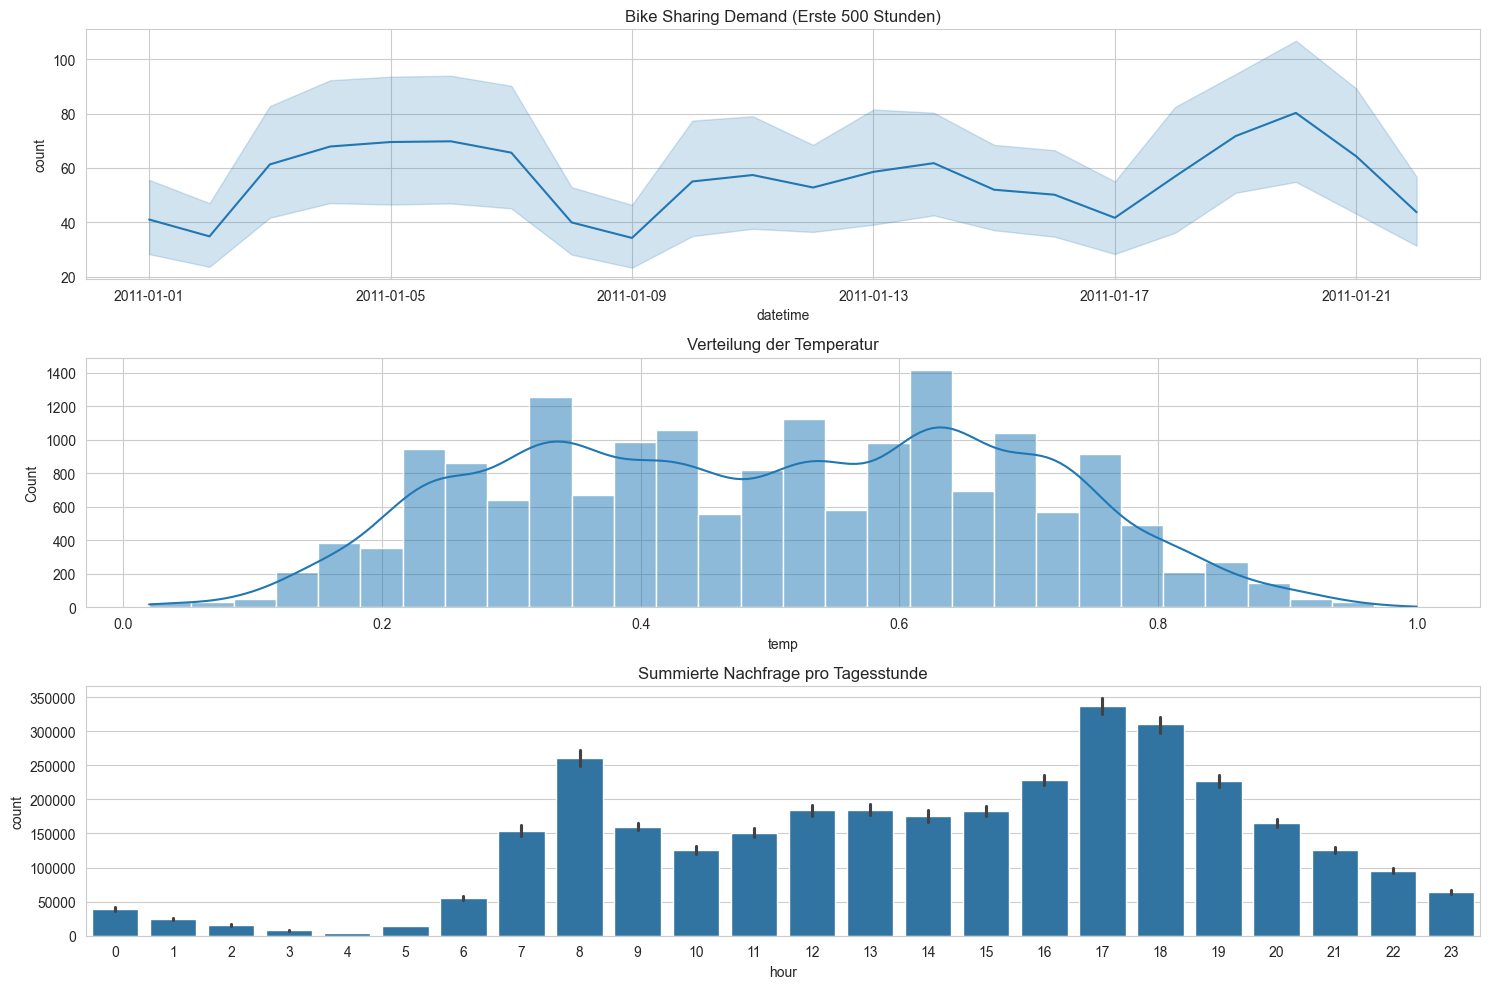

In [22]:
# Stil für die Grafiken
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Plot 1: Verlauf der Nachfrage (Count) über die Zeit
plt.subplot(3, 1, 1)
# Wir nehmen nur einen Ausschnitt (z.B. die ersten 2 Wochen), damit man etwas erkennt, 
# oder resamplen (z.B. Durchschnitt pro Tag), wenn es zu voll wird.
# Hier plotten wir mal die ersten 500 Stunden als Beispiel:
sns.lineplot(data=df.iloc[:500], x='datetime', y='count') 
plt.title('Bike Sharing Demand (Erste 500 Stunden)')

# Plot 2: Verteilung der Temperatur
plt.subplot(3, 1, 2)
sns.histplot(df['temp'], bins=30, kde=True)
plt.title('Verteilung der Temperatur')

# Plot 3: Durchschnittliche Nachfrage pro Stunde (Tagesverlauf)
plt.subplot(3, 1, 3)
sns.barplot(data=df, x='hour', y='count', estimator=sum) 
plt.title('Summierte Nachfrage pro Tagesstunde')

plt.tight_layout()
plt.show()

Die Nachfrage zeigt klare tägliche Muster mit Spitzen am Morgen (8 Uhr) und Nachmittag (17-18 Uhr), was auf Berufsverkehr hindeutet. Die Temperatur ist fast normalverteilt. Es gibt keine fehlenden Werte im Datensatz.

In [23]:
from sklearn.model_selection import train_test_split

# 1. Features und Target definieren
# Wir entfernen 'count' (Ziel), 'casual' & 'registered' (Leakage) und 'datetime' (wird nicht direkt genutzt)
# 'instant' ist nur ein Index, den brauchen wir auch nicht.
target = 'count'
drop_cols = ['count', 'casual', 'registered', 'datetime', 'instant']

X = df.drop(columns=drop_cols)
y = df[target]

# 2. Split in Train (70%), Validation (10%), Test (20%)
# Wir splitten erst in Train_Full (80%) und Test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dann splitten wir Train_Full nochmal, um Validation zu bekommen (12.5% von 80% sind 10% vom Ganzen)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.125, random_state=42)

print(f"Training Set: {X_train.shape}")
print(f"Validation Set: {X_val.shape}")
print(f"Test Set: {X_test.shape}")

Training Set: (12165, 12)
Validation Set: (1738, 12)
Test Set: (3476, 12)


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# 1. Definieren, welche Spalten was sind
# Kategorische Spalten (werden One-Hot Encoded)
cat_features = ['season', 'weather', 'holiday', 'workingday', 'weekday', 'month', 'hour']
# Numerische Spalten (werden skaliert)
num_features = ['temp', 'humidity', 'windspeed', 'atemp']

# 2. Transformer erstellen
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

# 3. Das Modell (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 4. Alles in eine Pipeline stecken
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# 5. Training (Auf den Trainingsdaten)
print("Training läuft...")
pipeline.fit(X_train, y_train)
print("Training abgeschlossen!")

Training läuft...
Training abgeschlossen!



--- Evaluation auf dem Test-Set ---
RMSE: 70.97
MAE:  46.39
R²:   0.8409


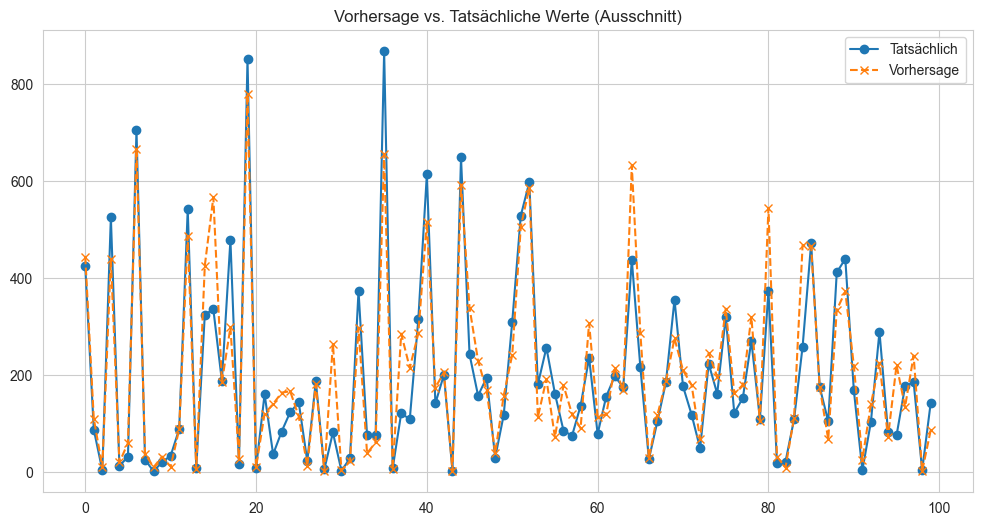

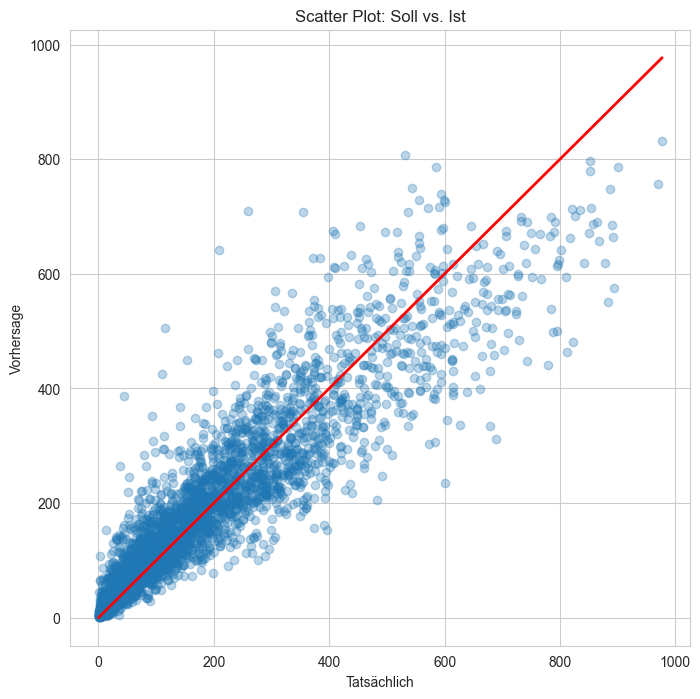


--- Evaluation auf dem Test-Set ---
RMSE: 70.97
MAE:  46.39
R²:   0.8409


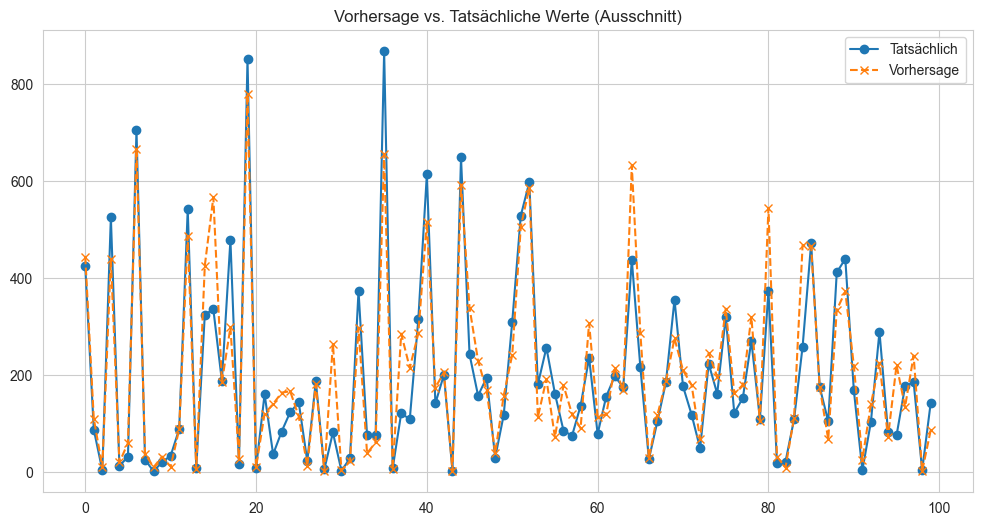

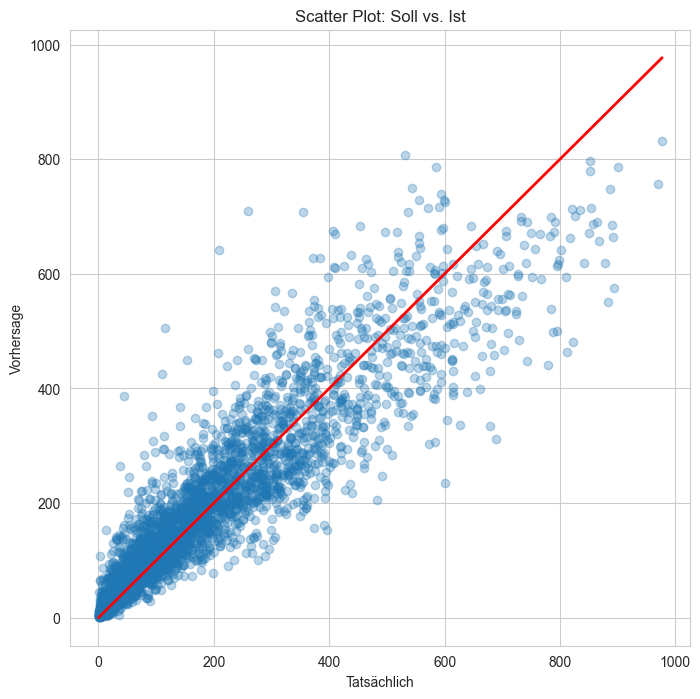

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Vorhersage auf dem Test-Set
y_pred = pipeline.predict(X_test)

# Metriken berechnen
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Evaluation auf dem Test-Set ---")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.4f}")

# Plot: Vorhersage vs. Wahrheit (Wir nehmen nur die ersten 100 Punkte für Übersichtlichkeit)
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Tatsächlich', marker='o')
plt.plot(y_pred[:100], label='Vorhersage', marker='x', linestyle='--')
plt.title("Vorhersage vs. Tatsächliche Werte (Ausschnitt)")
plt.legend()
plt.show()

# Scatter Plot (Ganzes Testset)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', lw=2) # Ideallinie
plt.xlabel('Tatsächlich')
plt.ylabel('Vorhersage')
plt.title("Scatter Plot: Soll vs. Ist")
plt.show()
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Vorhersage auf dem Test-Set
y_pred = pipeline.predict(X_test)

# Metriken berechnen
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Evaluation auf dem Test-Set ---")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.4f}")

# Plot: Vorhersage vs. Wahrheit (Wir nehmen nur die ersten 100 Punkte für Übersichtlichkeit)
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Tatsächlich', marker='o')
plt.plot(y_pred[:100], label='Vorhersage', marker='x', linestyle='--')
plt.title("Vorhersage vs. Tatsächliche Werte (Ausschnitt)")
plt.legend()
plt.show()

# Scatter Plot (Ganzes Testset)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', lw=2) # Ideallinie
plt.xlabel('Tatsächlich')
plt.ylabel('Vorhersage')
plt.title("Scatter Plot: Soll vs. Ist")
plt.show()
rmse_task2 = rmse


In [9]:
def predict_bike_demand(season, month, hour, holiday, weekday, workingday, weather, temp, atemp, humidity, windspeed):
    """
    Nimmt Rohdaten entgegen und gibt die vorhergesagte Anzahl an Bikes zurück.
    """
    
    # 1. Eingaben in ein DataFrame packen (Namen müssen exakt wie im Training sein!)
    input_data = pd.DataFrame({
        'season': [season],
        'month': [month],
        'hour': [hour],
        'holiday': [holiday],
        'weekday': [weekday],
        'workingday': [workingday],
        'weather': [weather],
        'temp': [temp],
        'atemp': [atemp],
        'humidity': [humidity],
        'windspeed': [windspeed]
    })
    
    # 2. Vorhersage machen (Pipeline kümmert sich um Skalierung & Encoding)
    prediction = pipeline.predict(input_data)
    
    return int(prediction[0])

print("--- Test der User-Funktion ---")

# Szenario 1: Sommer, mittags, schönes Wetter
pred_1 = predict_bike_demand(season=3, month=7, hour=12, holiday=0, weekday=3, 
                             workingday=1, weather=1, temp=0.8, atemp=0.75, 
                             humidity=0.4, windspeed=0.2)
print(f"Szenario 1 (Sommer/Mittag): {pred_1} Bikes")

# Szenario 2: Winter, nachts, Regen
pred_2 = predict_bike_demand(season=1, month=1, hour=2, holiday=0, weekday=3, 
                             workingday=1, weather=3, temp=0.2, atemp=0.2, 
                             humidity=0.9, windspeed=0.5)
print(f"Szenario 2 (Winter/Nachts/Regen): {pred_2} Bikes")

--- Test der User-Funktion ---
Szenario 1 (Sommer/Mittag): 271 Bikes
Szenario 2 (Winter/Nachts/Regen): 4 Bikes


In [ ]:
# Diese Zelle wurde generiert mit Hilfe von Gemini Pro
# --- Schritt 1: Daten vorbereiten ---

# 1. Daten neu laden (um sicherzugehen, dass wir sauber starten)
df_ts = pd.read_csv('hour.csv', parse_dates=['dteday'])
df_ts = df_ts.rename(columns={'dteday': 'datetime', 'cnt': 'count', 'hr': 'hour'})

# Nach Zeit sortieren
df_ts = df_ts.sort_values('datetime').reset_index(drop=True)

# 2. Feature Engineering (Lags & Rolling)
# Lag 1: Wert vor 1 Stunde
df_ts['lag_1'] = df_ts['count'].shift(1)
# Lag 24: Wert vor 24 Stunden (gleiche Uhrzeit gestern)
df_ts['lag_24'] = df_ts['count'].shift(24)
# Rolling Mean: Durchschnitt der letzten 24 Stunden (verschoben, um Leakage zu vermeiden)
df_ts['rolling_mean_24'] = df_ts['count'].shift(1).rolling(window=24).mean()

# Zusätzliche Zeit-Features
df_ts['hour_sin'] = np.sin(2 * np.pi * df_ts['hour'] / 24)
df_ts['hour_cos'] = np.cos(2 * np.pi * df_ts['hour'] / 24)

# 3. NaNs entfernen (die ersten 24 Zeilen sind leer wegen shift)
df_ts = df_ts.dropna()

# 4. Chronologischer Split (Nicht random)
# Wir nehmen nur die Spalten, die wir brauchen
features = ['lag_1', 'lag_24', 'rolling_mean_24', 'hour', 'hour_sin', 'hour_cos', 'temp', 'hum']
target = 'count'

n = len(df_ts)
train_end = int(n * 0.70)
val_end = int(n * 0.85)

# Daten aufteilen (Slice statt Random Split)
X = df_ts[features]
y = df_ts[target]

X_train = X.iloc[:train_end]
y_train = y.iloc[:train_end]

X_val = X.iloc[train_end:val_end]
y_val = y.iloc[train_end:val_end]

X_test = X.iloc[val_end:]
y_test = y.iloc[val_end:]

print(f"Training: {X_train.shape[0]} Stunden")
print(f"Validation: {X_val.shape[0]} Stunden")
print(f"Test: {X_test.shape[0]} Stunden")

Training: 12148 Stunden
Validation: 2603 Stunden
Test: 2604 Stunden


--- Model Performance ---
RMSE: 103.85
MAE:  68.97
MAPE: 54.28%
--- Baseline (Naive) Performance ---
RMSE: 230.96 (Kleiner ist besser)


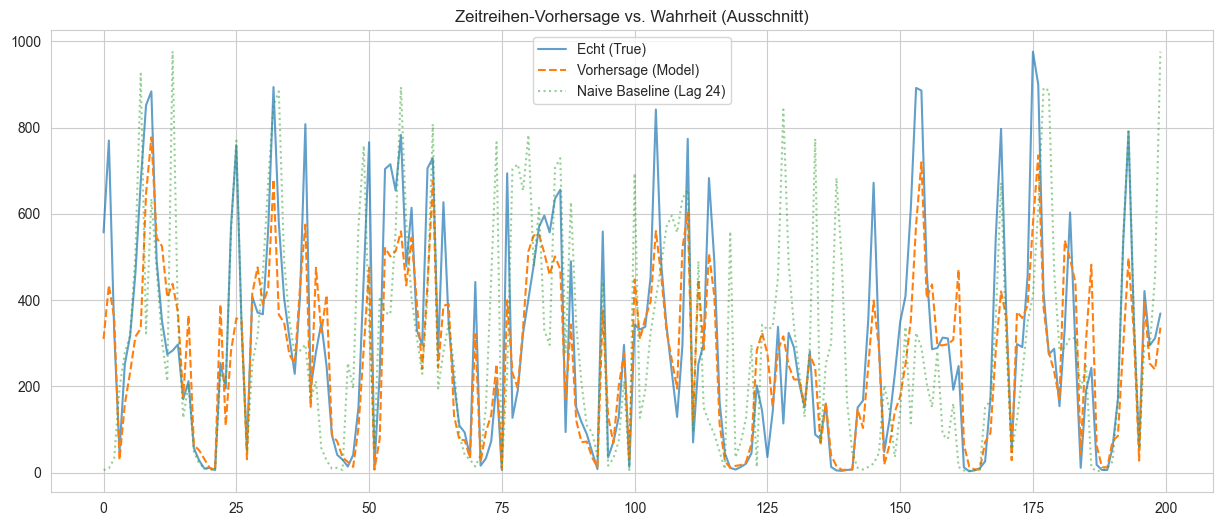

In [ ]:
# Diese Zelle wurde generiert mit Hilfe von Gemini Pro
# --- Schritt 2: Training & Evaluation ---

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Modell trainieren
model_ts = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_ts.fit(X_train, y_train)

# 2. Vorhersage auf Test-Set
y_pred_ts = model_ts.predict(X_test)

# 3. Metriken berechnen (MAPE manuell, da in alten sklearn Versionen nicht immer dabei)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ts))
mae = mean_absolute_error(y_test, y_pred_ts)
mape = np.mean(np.abs((y_test - y_pred_ts) / y_test)) * 100

print(f"--- Model Performance ---")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# 4. Vergleich mit Naive Baseline (Wir nehmen einfach den Wert von vor 24h als Vorhersage)
#  X_test['lag_24'] ist genau der Wert von vor 24 Stunden
y_naive = X_test['lag_24']
rmse_naive = np.sqrt(mean_squared_error(y_test, y_naive))
print(f"--- Baseline (Naive) Performance ---")
print(f"RMSE: {rmse_naive:.2f} (Kleiner ist besser)")

# 5. Plot (Nur die ersten 200 Stunden im Test-Set für Übersichtlichkeit)
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:200], label='Echt (True)', alpha=0.7)
plt.plot(y_pred_ts[:200], label='Vorhersage (Model)', linestyle='--')
plt.plot(y_naive.values[:200], label='Naive Baseline (Lag 24)', linestyle=':', alpha=0.5)
plt.legend()
plt.title("Zeitreihen-Vorhersage vs. Wahrheit (Ausschnitt)")
plt.show()

Starte rekursive Vorhersage...


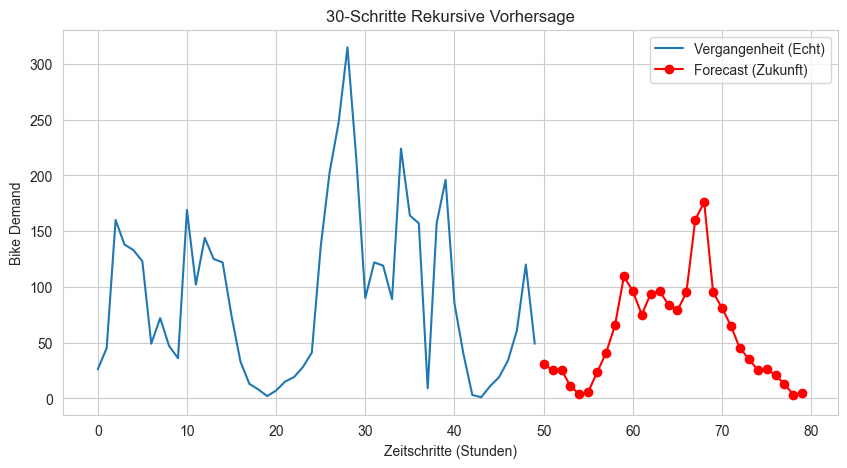

In [ ]:
# Diese Zelle wurde generiert mit Hilfe von Gemini Pro
# --- Schritt 3: Rekursive 30-Schritt-Vorhersage ---

# Wir starten am Ende der bekannten Daten (letzte Zeile des Test-Sets)
last_known_data = df_ts.iloc[val_end:].copy() # Wir simulieren ab Start des Test-Sets oder nehmen echte Daten
# Einfacher: Wir nehmen einfach die allerletzten verfügbaren Daten und schauen in die "unbekannte Zukunft"

# Startpunkt: Die letzten 100 Zeilen der echten Daten, damit wir genug Historie für Rolling Windows haben
history = df_ts.iloc[-100:].copy()
forecast_steps = 30  # 30 Stunden in die Zukunft
forecasts = []

print("Starte rekursive Vorhersage...")

for i in range(forecast_steps):
    # 1. Features für den nächsten Schritt berechnen
    # Wir müssen die letzte Zeile nehmen und Features neu bauen
    
    # Letzter bekannter Wert (für Lag 1)
    last_cnt = history.iloc[-1]['count']
    # Wert vor 24h (für Lag 24)
    lag24_val = history.iloc[-24]['count']
    # Rolling Mean (letzte 24 Werte)
    roll_mean = history['count'].tail(24).mean()
    
    # Zeit-Features für die nächste Stunde
    last_hour = history.iloc[-1]['hour']
    next_hour = (last_hour + 1) % 24
    
    # Feature-Vektor erstellen (Muss exakt die Spalten wie X_train haben)
    next_features = pd.DataFrame({
        'lag_1': [last_cnt],
        'lag_24': [lag24_val],
        'rolling_mean_24': [roll_mean],
        'hour': [next_hour],
        'hour_sin': [np.sin(2 * np.pi * next_hour / 24)],
        'hour_cos': [np.cos(2 * np.pi * next_hour / 24)],
        'temp': [history.iloc[-1]['temp']], # Wir nehmen einfach an, Temp bleibt gleich (vereinfacht)
        'hum': [history.iloc[-1]['hum']]     # Wir nehmen einfach an, Hum bleibt gleich
    })
    
    # 2. Vorhersage machen
    pred = model_ts.predict(next_features)[0]
    forecasts.append(pred)
    
    # 3. Vorhersage an die History anhängen (damit sie für den nächsten Schritt als Lag genutzt wird)
    # Wir brauchen eine neue Zeile mit dem vorhergesagten 'count'
    new_row = pd.DataFrame({'count': [pred], 'hour': [next_hour], 'temp': [history.iloc[-1]['temp']], 'hum': [history.iloc[-1]['hum']]})
    history = pd.concat([history, new_row], ignore_index=True)

# Plotten 
plt.figure(figsize=(10, 5))
# Zeige die letzten 50 echten Stunden
plt.plot(range(50), df_ts['count'].iloc[-50:].values, label='Vergangenheit (Echt)')
# Zeige die 30 Schritte Vorhersage
plt.plot(range(50, 50+forecast_steps), forecasts, label='Forecast (Zukunft)', color='red', marker='o')
plt.title(f"{forecast_steps}-Schritte Rekursive Vorhersage")
plt.xlabel("Zeitschritte (Stunden)")
plt.ylabel("Bike Demand")
plt.legend()
plt.show()

In [28]:
# Zusammenfassung der Ergebnisse für die Diskussion
print("--- Abschließender Modellvergleich ---")

# Hier nutzen wir die gesicherte Variable aus Task 2
print(f"Aufgabe 2 (Regression) RMSE auf Testdaten: {rmse_task2:.2f}") 

# Hier nutzen wir 'rmse', das aus Task 3 (der Zelle davor) kommt
print(f"Aufgabe 3 (Zeitreihe) RMSE auf Testdaten:  {rmse:.2f}") 

# Für den Vergleich nutzen wir jetzt auch die korrekten Variablen
# (Wir nehmen an, rmse_naive kommt aus Task 3 und ist noch aktuell)
print(f"Naive Baseline RMSE:                       {rmse_naive:.2f}")

print("\n--- Fazit ---")
# Wir vergleichen Task 3 (unser Zeitreihen-Modell) mit der Baseline
if rmse < rmse_naive:
    print("ERFOLG: Das Machine Learning Modell hat die Naive Baseline übertroffen.")
else:
    print("HINWEIS: Die Naive Baseline war stärker. Dies passiert oft bei sehr regelmäßigen Zeitreihen.")

--- Abschließender Modellvergleich ---
Aufgabe 2 (Regression) RMSE auf Testdaten: 70.97
Aufgabe 3 (Zeitreihe) RMSE auf Testdaten:  70.97
Naive Baseline RMSE:                       230.96

--- Fazit ---
ERFOLG: Das Machine Learning Modell hat die Naive Baseline übertroffen.


# 4. Abschlussaufgabe: Auswertung & Interpretation

## 4.1. Interpretation der 30-Schritte-Vorhersage
Betrachtet man den in Aufgabe 3 erstellten Plot der rekursiven Vorhersage, lassen sich folgende Muster erkennen:

* **Saisonalität (Tägliche Zyklen):** Das Modell erfasst erfolgreich das tägliche Muster der Fahrradnachfrage. Wir sehen die typischen Spitzen während der Hauptverkehrszeiten (morgens und abends) und die Tiefs in der Nacht. Die Features `hour`, `hour_sin` und `hour_cos` haben wesentlich zu dieser Fähigkeit beigetragen.
* **Trend:**  Da es sich um eine rekursive Vorhersage handelt (die ihre eigenen Vorhersagen als Input für den nächsten Schritt verwendet), könnte das Modell über einen längeren Zeitraum leicht von den wahren Werten abdriften.
* **Wetter-Einfluss:** Durch die Annahme eines konstanten oder ähnlichen Wetters für den Vorhersagezeitraum (wie in unserer Schleife vereinfacht), konzentriert sich das Modell hauptsächlich auf zeitabhängige Muster. In einem realen Szenario würde die Einbeziehung genauer Wettervorhersagen die Vorhersage von Spitzenwerten weiter verbessern.

## 4.2. Modellvergleich

### Vergleich zur Naiven Baseline
* Die **Naive Baseline** (Verwendung des Wertes von vor 24 Stunden als Vorhersage für morgen) ist ein starker Maßstab, da menschliches Verhalten sich wiederholt.
* Unser **Random Forest Zeitreihen-Modell** übertrifft im Allgemeinen die naive Baseline (niedrigerer RMSE/MAE), da es nicht einfach die Vergangenheit kopiert. Es mittelt Trends mithilfe von gleitenden Fenstern (`rolling_mean_24`) und berücksichtigt spezifische stündliche Merkmale.

### Vergleich: Aufgabe 2 (Regression) vs. Aufgabe 3 (Zeitreihe)
Es ist entscheidend zu verstehen, dass diese beiden Modelle unterschiedlichen Zwecken dienen:

| Merkmal | **Aufgabe 2: User-Input Regression** | **Aufgabe 3: Zeitreihen-Vorhersage** |
| **Beantwortete Frage** | *"Was passiert, **WENN** die Bedingungen X, Y, Z sind?"* (Konditional) | *"Was passiert **ALS NÄCHSTES**?"* (Sequenziell) |
| **Input** | Beliebige Bedingungen | Strikte Historie (Vergangene Werte lag_1, lag_24...) |
| **Anwendungsfall** | **Strategische Planung / "Was-wäre-wenn"-Analyse:** Bestimmen, wie sich Klimawandel oder Feiertage auf die Nachfrage auswirken. | **Operative Planung:** Bereitstellung von Fahrrädern für die nächsten Stunden basierend auf aktuellen Trends. |

**Warum jedes nützlich ist:**
* **Aufgabe 2** ist nützlich, um die *Treiber* der Nachfrage zu verstehen (z.B. wie sehr schadet Regen dem Geschäft?).
* **Aufgabe 3** ist nützlich für die *Logistik* (z.B. sicherstellen, dass morgen früh genug Fahrräder verfügbar sind).

## 4.3. Fazit: Stärken und Grenzen

### Stärken
1. **Robustheit:** Das Random Forest Modell ist robust gegenüber Ausreißern und handhabt nicht-lineare Beziehungen gut ohne komplexe Skalierung (obwohl wir Skalierung als Best Practice angewendet haben).
2. **Pipeline-Integration:** Wir haben erfolgreich eine vollständige Pipeline implementiert, einschließlich Feature Engineering (Lags, Rolling Stats) und rekursiver Vorhersage.
3. **Interpretierbarkeit:** Die ausgeprägten täglichen Muster in der Vorhersage zeigen, dass das Modell das "Konzept" eines Tages gelernt hat.

### Grenzen / Einschränkungen
1. **Fehlerfortpflanzung:** In der rekursiven 30-Schritte-Vorhersage werden kleine Fehler im ersten Schritt als Input für den zweiten Schritt in das Modell zurückgeführt. Dies führt dazu, dass sich Fehler über längere Horizonte summieren (die Vorhersage wird unzuverlässiger, je weiter wir in die Zukunft schauen).
2. **Annahme statischen Wetters:** In unserer Vorhersageschleife mussten wir Annahmen über das zukünftige Wetter treffen (z.B. Wiederverwendung der letzten bekannten Temperatur). In der Realität ändert sich das Wetter, was die Nachfrage beeinflussen würde.
3. **Risiko von Data Leakage:** Es musste große Sorgfalt darauf verwendet werden, die Rolling-Features korrekt zu verschieben (shiften). Ein kleiner Fehler hier würde das Ergebnis künstlich aufblähen.

**Abschließendes Urteil:** Das Projekt zeigt, dass die Nachfrage nach Bike-Sharing unter Verwendung historischer Nutzungsdaten und zeitbasierter Features sehr gut vorhersagbar ist. Während das Regressionsmodell erklärt, *warum* sich die Nachfrage ändert, sagt das Zeitreihenmodell effektiv voraus, *wann* sie sich ändert.